In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools

In [ ]:
# CSV dosyalarının yollarını belirleyin
paths = [
    "../results/cell2location/spatial_model_SC_Y_sig_matrix_adeno_LUSC_patients/Background/deconv_2/merge_luad_background.csv",
    "../results/cell2location/spatial_model_SC_Y_sig_matrix_adeno_LUSC_patients/Tumour/deconv_2/merge_tumour.csv",
    "../results/cell2location/spatial_model_SC_Y_sig_matrix_adeno_LUSC_patients/Healthy/deconv_2/merge_luad_normal.csv",
    "../results/cell2location/spatial_model_SC_Y_sig_matrix_adeno_LUAD_patients/Background/deconv_2/merge_luad_background.csv",
    "../results/cell2location/spatial_model_SC_Y_sig_matrix_adeno_LUAD_patients/Tumour/deconv_2/merge_luad_tumour.csv",
    "../results/cell2location/spatial_model_SC_Y_sig_matrix_adeno_LUAD_patients/Healthy/deconv_2/merge_luad_normal.csv"
]

# CSV dosyalarını okuma ve listeye ekleme
dfs = []
for path in paths:
    df = pd.read_csv(path)  # Dosyayı oku
    dfs.append(df)  # Listeye ekle

# DataFrame'leri birleştir
combined_df = pd.concat(dfs, ignore_index=True)

# Birleştirilmiş veriyi bir CSV dosyasına kaydet
combined_df.to_csv("../results/cell2location/merged_all.csv", index=False)


In [15]:
# Load the data from the CSV file
df = pd.read_csv('../results/cell2location/merged_all.csv')

# Calculate RTM / LA ratio
df['LA_RTM_ratio'] = df['LA_TAMs'] / df['RTM_TAMs']

# Exclude rows where TissueStage is "Normal"
df_filtered = df[df['TissueStage'] != 'Normal']
df_filtered = df_filtered[df_filtered['TissueStage'] != 'Background']
df_filtered

,Unnamed: 0,RTM_TAMs,Prolif_TAMs,Angio_TAMs,LA_TAMs,IFN_TAMs,Inflam_TAMs,Reg_TAMs,max_w,x,y,patient_id,sample_id,Condition,TissueStage,UICC,LUAD,LA_RTM_ratio
909,GCGGACCGCGTTGTGG-1,1.025830,1.434531,0.796975,0.919123,0.703304,0.416624,1.027433,Prolif_TAMs,6158,10950,P11,T4,LUSC,Tumour,IIA,NaN,0.895980
910,TCCAACTTTAAATTCT-1,0.934320,1.390621,0.763114,0.870658,0.750651,0.375293,0.992757,Prolif_TAMs,5828,8849,P11,T4,LUSC,Tumour,IIA,NaN,0.931863
911,GGGCGGCAAATGAATT-1,0.973974,1.464383,0.784592,0.957308,0.730119,0.404479,0.994444,Prolif_TAMs,6378,10568,P11,T4,LUSC,Tumour,IIA,NaN,0.982889
912,GTGGAGTCGGCGGTTG-1,1.032258,1.457211,0.791415,0.907579,0.768058,0.403189,1.018271,Prolif_TAMs,5609,11524,P11,T4,LUSC,Tumour,IIA,NaN,0.879217
913,GAGTATGCCCGCCTTG-1,0.984477,1.441010,0.742968,0.954092,0.779690,0.413413,0.990139,Prolif_TAMs,6158,10568,P11,T4,LUSC,Tumour,IIA,NaN,0.969136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9532,AGTTAAACACTTGCGA-1,1.290517,0.763044,0.737694,0.949500,0.792694,0.438134,0.842337,RTM_TAMs,6769,9369,D2,2,Normal,Healthy,NaN,NaN,0.735752
9533,GCGACGATAGTTGTAC-1,1.273164,0.763427,0.719917,0.937367,0.758945,0.459377,0.824255,RTM_TAMs,7896,10948,D2,2,Normal,Healthy,NaN,NaN,0.736250
9534,CATGGTAAGTAGCGTT-1,1.216059,0.734195,0.712268,0.871814,0.739762,0.438311,0.780410,RTM_TAMs,10047,10363,D2,2,Normal,Healthy,NaN,NaN,0.716917
9535,AGGCTTGCTAGACACC-1,1.263426,0.750728,0.753387,0.882998,0.756401,0.448031,0.825336,RTM_TAMs,3837,6211,D2,2,Normal,Healthy,NaN,NaN,0.698892


In [23]:
df['TissueStage'].value_counts()



TissueStage
Tumour        5945
Background    2814
Healthy        778
Name: count, dtype: int64

In [17]:
df_filtered['UICC'].unique()

array(['IIA', 'III', nan], dtype=object)

/Users/yasinkaymaz/Dropbox/Papers/Projects/Project_GSNetAct/.venv/lib/python3.12/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


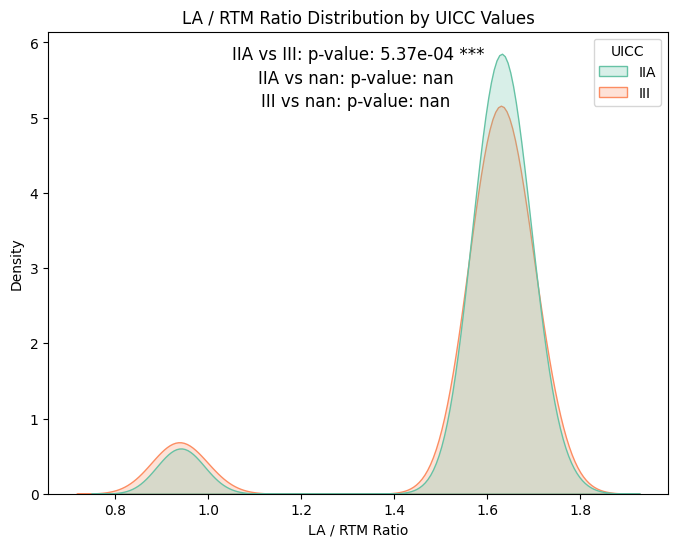

In [19]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the distribution of RTM_LA_ratio by UICC, excluding "Normal" TissueStage
sns.kdeplot(data=df_filtered, x="LA_RTM_ratio", hue="UICC", fill=True, palette="Set2", common_norm=False)

# Get unique values of UICC
uicc_values = df_filtered['UICC'].unique()

# Perform pairwise t-tests for each combination of UICC values
for uicc1, uicc2 in itertools.combinations(uicc_values, 2):
    group1 = df_filtered[df_filtered['UICC'] == uicc1]['LA_RTM_ratio']
    group2 = df_filtered[df_filtered['UICC'] == uicc2]['LA_RTM_ratio']
    
    # Perform t-test and get p-value
    t_stat, p_value = stats.ttest_ind(group1, group2)
    
    # Add significance stars based on the p-value
    star = ''
    if p_value < 0.001:
        star = '***'
    elif p_value < 0.01:
        star = '**'
    elif p_value < 0.05:
        star = '*'
    
    # Add p-value and stars to the plot
    # Adjust the text position for each pair of UICC values
    plt.text(0.5, 0.95 - 0.05 * (list(itertools.combinations(uicc_values, 2)).index((uicc1, uicc2))), 
             f"{uicc1} vs {uicc2}: p-value: {p_value:.2e} {star}", 
             ha="center", va="center", fontsize=12, color="black", transform=plt.gca().transAxes)

# Set plot title and labels
plt.title(f"LA / RTM Ratio Distribution by UICC Values")
plt.xlabel("LA / RTM Ratio")
plt.ylabel("Density")

# Display the plot
plt.show()



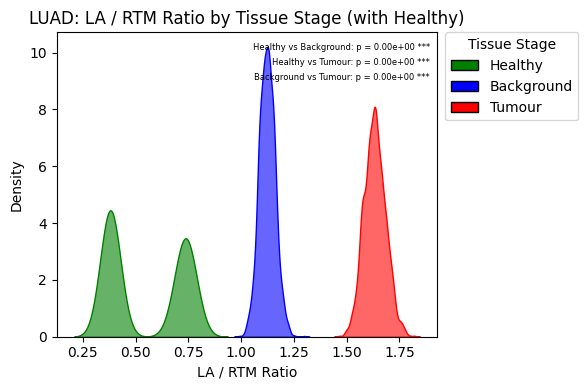

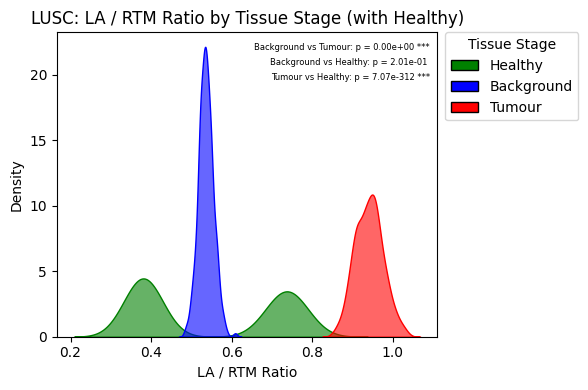

In [34]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy import stats
from matplotlib.patches import Patch

# Ensure results directory exists
os.makedirs("../figures", exist_ok=True)

# Calculate the LA / RTM ratio
df['LA_RTM_ratio'] = df['LA_TAMs'] / df['RTM_TAMs']

# Define custom color palette
custom_palette = {
    'Healthy': 'green',
    'Background': 'blue',
    'Tumour': 'red'  # Make sure this matches your actual df['TissueStage'] values
}

# Define custom legend patches
legend_elements = [Patch(facecolor=color, edgecolor='black', label=label)
                   for label, color in custom_palette.items()]

for condition in ['LUAD', 'LUSC']:
    # Include both target condition and healthy tissue samples
    subset = df[(df['Condition'] == condition) | (df['TissueStage'] == 'Healthy')]

    fig, ax = plt.subplots(figsize=(6, 4))

    # Plot KDE with custom color palette, suppress auto-legend
    sns.kdeplot(data=subset, x="LA_RTM_ratio", hue="TissueStage", fill=True,
                palette=custom_palette, common_norm=False, alpha=0.6, ax=ax, legend=False)

    # Add custom legend outside the plot
    ax.legend(handles=legend_elements, title='Tissue Stage',
              bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

    # Perform pairwise t-tests for all tissue stage combinations
    stages = subset['TissueStage'].unique()
    for i, (stage1, stage2) in enumerate(itertools.combinations(stages, 2)):
        group1 = subset[subset['TissueStage'] == stage1]['LA_RTM_ratio']
        group2 = subset[subset['TissueStage'] == stage2]['LA_RTM_ratio']

        if len(group1) >= 2 and len(group2) >= 2:
            t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

            star = ''
            if p_value < 0.001:
                star = '***'
            elif p_value < 0.01:
                star = '**'
            elif p_value < 0.05:
                star = '*'

            # Display p-value annotation on the right side
            ax.text(0.98, 0.95 - 0.05 * i,
                    f"{stage1} vs {stage2}: p = {p_value:.2e} {star}",
                    ha="right", va="center", fontsize=6, color="black", transform=ax.transAxes)

    # Set plot labels and title
    ax.set_title(f"{condition}: LA / RTM Ratio by Tissue Stage (with Healthy)")
    ax.set_xlabel("LA / RTM Ratio")
    ax.set_ylabel("Density")

    plt.tight_layout()

    # Save figure as PDF
    plt.savefig(f"../figures/{condition}_LA_RTM_ratio_distribution.pdf", bbox_inches='tight')

    plt.show()



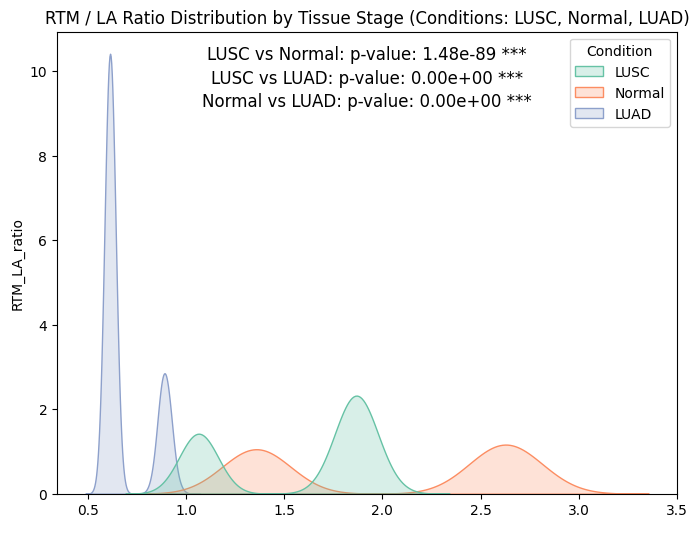

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools

# Calculate the RTM / LA ratio
df['RTM_LA_ratio'] = df['RTM_TAMs'] / df['LA_TAMs']

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the distribution of RTM_LA_ratio by TissueStage
sns.kdeplot(data=df, x="RTM_LA_ratio", hue="Condition", fill=True, palette="Set2", common_norm=False)

# Get unique conditions from the 'Condition' column
conditions = df['Condition'].unique()

# Perform pairwise t-tests for each combination of conditions
for condition1, condition2 in itertools.combinations(conditions, 2):
    group1 = df[df['Condition'] == condition1]['RTM_LA_ratio']
    group2 = df[df['Condition'] == condition2]['RTM_LA_ratio']
    
    # Perform t-test and calculate p-value
    t_stat, p_value = stats.ttest_ind(group1, group2)
    
    # Add stars based on the p-value
    star = ''
    if p_value < 0.001:
        star = '***'
    elif p_value < 0.01:
        star = '**'
    elif p_value < 0.05:
        star = '*'
    
    # Add p-value and stars to the plot
    # Adjust text positioning on the plot
    plt.text(0.5, 0.95 - 0.05 * (list(itertools.combinations(conditions, 2)).index((condition1, condition2))), 
             f"{condition1} vs {condition2}: p-value: {p_value:.2e} {star}", 
             ha="center", va="center", fontsize=12, color="black", transform=plt.gca().transAxes)

# Set plot titles and labels
plt.title(f"RTM / LA Ratio Distribution by Tissue Stage (Conditions: {', '.join(conditions)})")
plt.xlabel(" ")
plt.ylabel("RTM_LA_ratio")

# Display the plot
plt.show()
